# AML ASSIGNMENT 03
## Bilal Ahmed Khan
## Roll No: k200183
## Section: B

In [106]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
# using support vector classifier for this assignment
from sklearn.svm import SVC

In [107]:
# Load the Iris dataset from scikit learn
iris = load_iris()
X = iris.data
y = iris.target


# Convert the dataset labels to {-1, 1}
y = np.where(y == 0, -1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [109]:
# Implementing the Adaboost class
class AdaBoost:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []
    def plot_decision_boundary(X, y, model, ax, pca):
        h = 0.02  # Step size in the mesh
        cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])

        if X.shape[1] > 2:
            X = pca.transform(X)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k', s=20)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())

    def visualize_results(X_train, y_train, X_test, y_test, model):
        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train)

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        plot_decision_boundary(X_train_pca, y_train, model, axes[0], pca)
        axes[0].set_title('Decision Boundary on Training Data (PCA)')

        X_test_pca = pca.transform(X_test)

        # Plot decision boundary on test data
        plot_decision_boundary(X_test_pca, y_test, model, axes[1], pca)
        axes[1].set_title('Decision Boundary on Test Data (PCA)')

        plt.show()
    def fit(self, X, y):
        m = X.shape[0]
        w = np.ones(m) / m 

        for _ in range(self.n_estimators):

            model = SVC(kernel='linear')
            model.fit(X, y, sample_weight=w)

            predictions = model.predict(X)

            err = np.sum(w * (predictions != y)) / np.sum(w)

            err = max(err, 1e-10)
            err = min(err, 1 - 1e-10)

            alpha = 0.5 * np.log((1 - err) / err)

            w = w * np.exp(-alpha * y * predictions)
            w /= np.sum(w)

            
            self.alphas.append(alpha)
            self.models.append(model)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models]).T

        weighted_sum = np.dot(predictions, self.alphas)

        final_predictions = np.sign(weighted_sum)

        return final_predictions
      

Accuracy of the Adaboost classifier is: 1.0


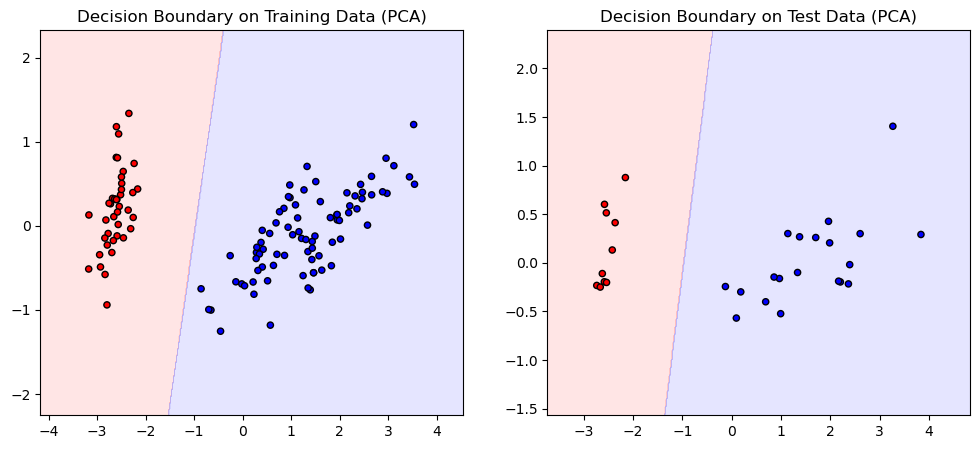

In [111]:
if __name__ == "__main__":
    iris = load_iris()
    X = iris.data
    y = iris.target

    y = np.where(y == 0, -1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    n_estimators = 5
    adaboost = AdaBoost(n_estimators)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the Adaboost classifier is: {accuracy}")
    visualize_results(X_train, y_train, X_test, y_test, adaboost)  